### Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pink_0 = '#e88ebf'
pink_1 = '#edb0cf'
pink_2 = '#f0d0e0'
beige = '#f1f1f1'
blue_2 = '#c4dbeb'
blue_1 = '#94c7e4'
blue_0 = '#59b2de'
green = '#caf1da'
red = '#f4bfbd'

color_dict = {'negative': blue_1, 'positive': pink_1,  0: blue_1, 1: pink_1}
model_color_dict = {
    'Naive Bayes': pink_2,
    'SVM': pink_0,
    'Random forest': pink_1,
    'CNN': blue_2,
    'LSTM':blue_1,
    'CNN-LSTM Ensemble': blue_0
  }


# Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.width', 50)
pd.set_option('display.max_colwidth', -1)

data_file = "drive/MyDrive/IMDB_Dataset.csv"
data = pd.read_csv(data_file, header=0, low_memory=False)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


review sentiment
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.  positive
1  A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             positive
2  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully i

In [ ]:
reviews = data.iloc[0:, -2]
reviews.head()

0    One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

In [ ]:
labels = data.iloc[0:, -1]

labels = labels.replace("negative", 0)
labels = labels.replace("positive", 1)

labels.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

## Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup
reviews = reviews.apply(lambda text: BeautifulSoup(text).get_text())
reviews.head()

NameError: ignored

## Visualisation

In [ ]:
from wordcloud import  WordCloud
def get_wordcloud(sentiment, color):
  words=' '.join(map(str,reviews[data['sentiment']==sentiment]))
  return WordCloud(width = 800, height = 800, 
                background_color =color, 
                min_font_size = 10).generate(words) 

def plot_wordcloud(sentiment, color):
  plt.figure(figsize=(8,8))
  plt.imshow(get_wordcloud(sentiment, color))
  plt.axis('off')
  plt.show()

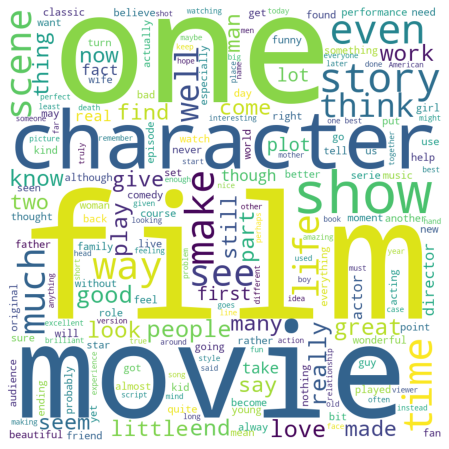

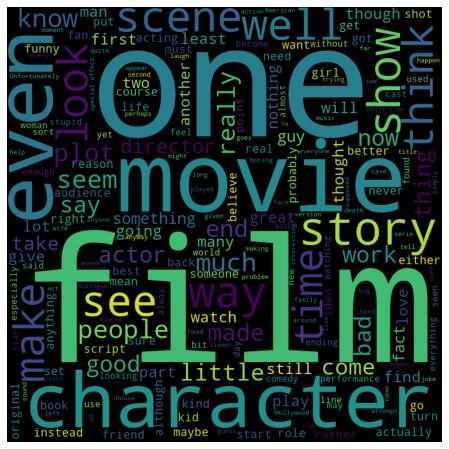

In [ ]:
#@title
plot_wordcloud('positive', 'white')
plot_wordcloud('negative', 'black')

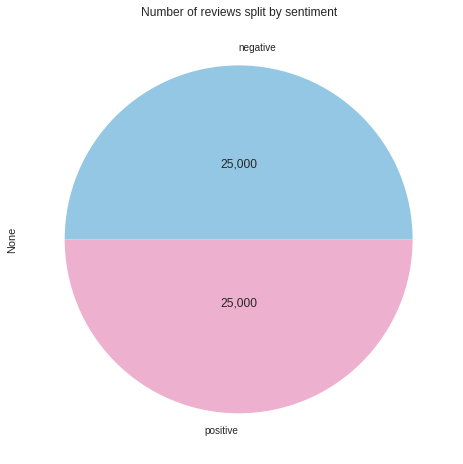

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Pastel2') 

def pie_plot(dataframe, title):
  plt.figure(figsize=(12, 8))
  ax = dataframe.plot(kind='pie', colors=[color_dict.get(x, pink_1) for x in dataframe.index])
  plt.title(title)

  i = 0
  for patch, label in zip(ax.patches, dataframe):
      x, y = patch.center
      ax.text(x, y + (0.4*((-1)**i)), '{:,}'.format(label),
              ha='center', va='bottom')
      i+=1

pie_plot(data.groupby(['sentiment']).size(), 'Number of reviews split by sentiment')

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=1)

train_labels = train_labels.astype('int')
test_labels = test_labels.astype('int')

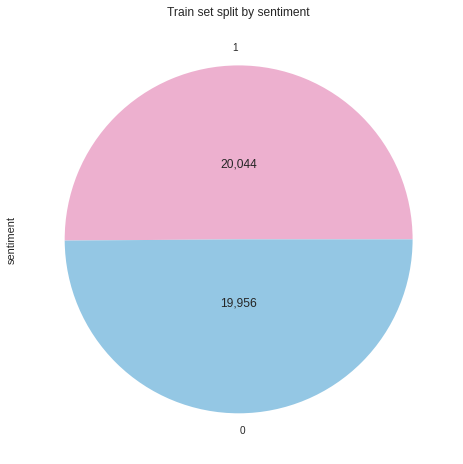

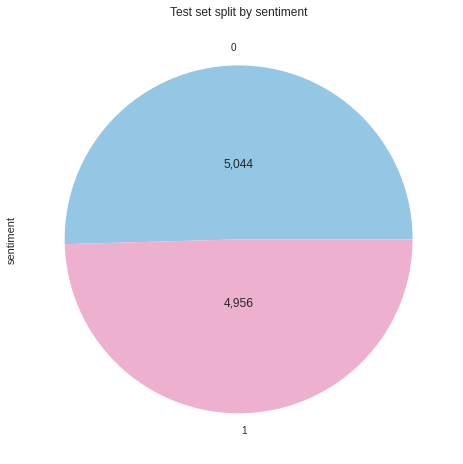

In [ ]:
pie_plot(train_labels.value_counts() , 'Train set split by sentiment')
pie_plot(test_labels.value_counts() , 'Test set split by sentiment')

##  Vectorization

### Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
english_stopwords = set(stopwords.words('english') + list(punctuation) + ['“', '”', '’'])
english_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

### Simple count

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words=english_stopwords) 
train_data_count = count_vectorizer.fit_transform(train_data)
test_data_count = count_vectorizer.transform(test_data)

### Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=english_stopwords)
train_data_tfidf = tfidf_vectorizer.fit_transform(train_data)
test_data_tfidf = tfidf_vectorizer.transform(test_data)

# Visualisation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e35c0ad0>,
                    color='pink',
                    features=['00', '000', '00000000000', '0000000000001',
                              '00001', '00015', '000dm', '001', '003830',
                              '0069', '007', '0079', '007s', '0080', '0083',
                              '0093638', '00am', '00o', '00pm', '00s',
                              '00schneider', '01', '0148', '01pm', '02',
                              '020410', '0230', '02i', '02year', '03', ...],
                    n=None, orient='h')

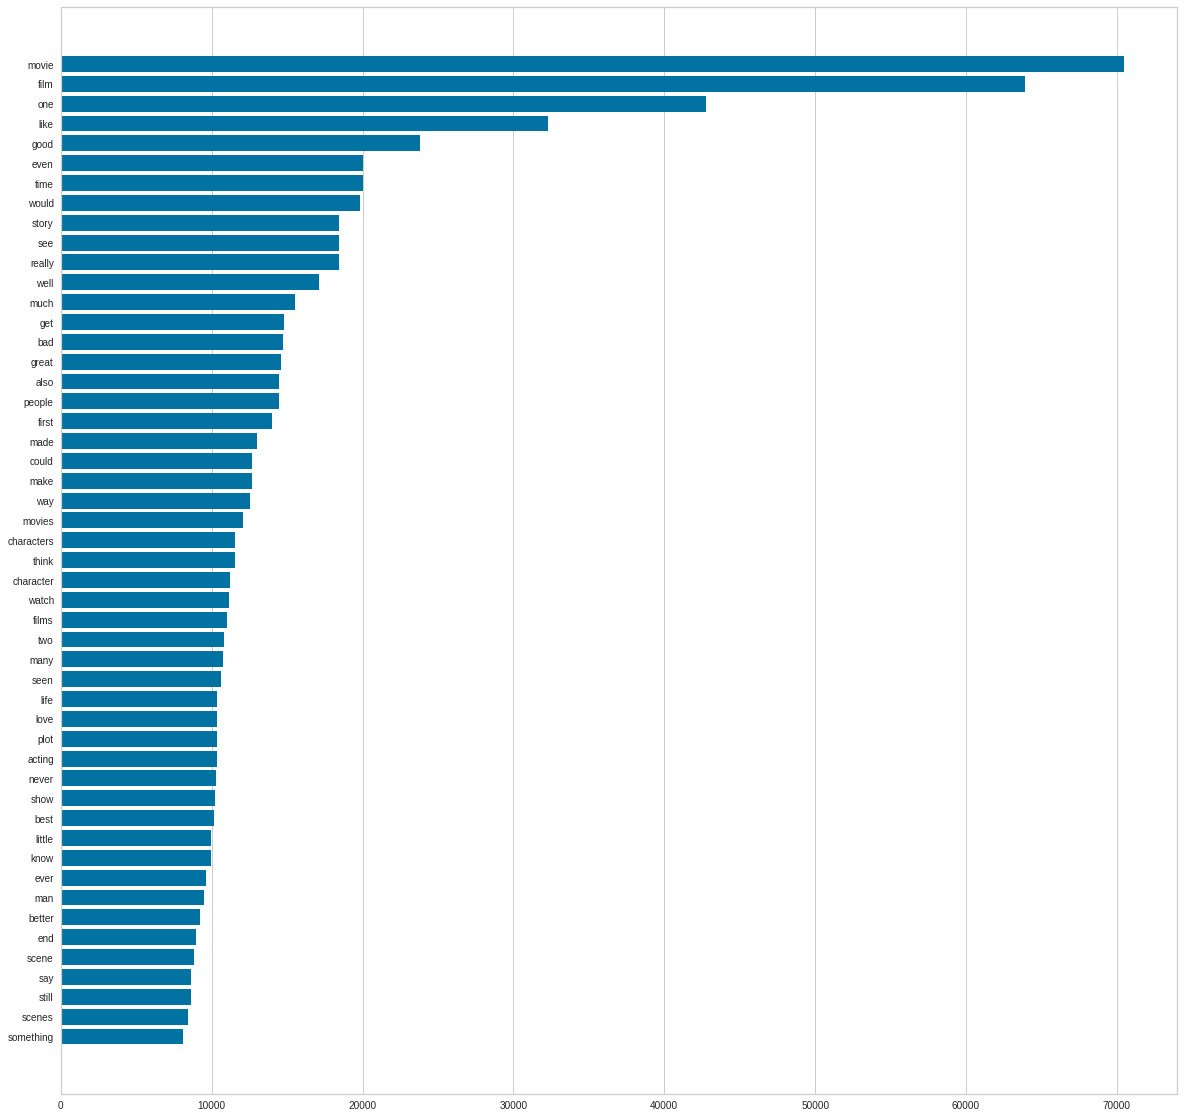

In [ ]:
from yellowbrick.text import FreqDistVisualizer

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

freq_dist_viz = FreqDistVisualizer(features=count_vectorizer.get_feature_names(), n=50, ax=ax)

freq_dist_viz.fit(train_data_count)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd8c21110>,
               classes=None, colormap=None, colors=['tomato', 'lime'],
               decompose=None, decompose_by=None, labels=None,
               random_state=123)

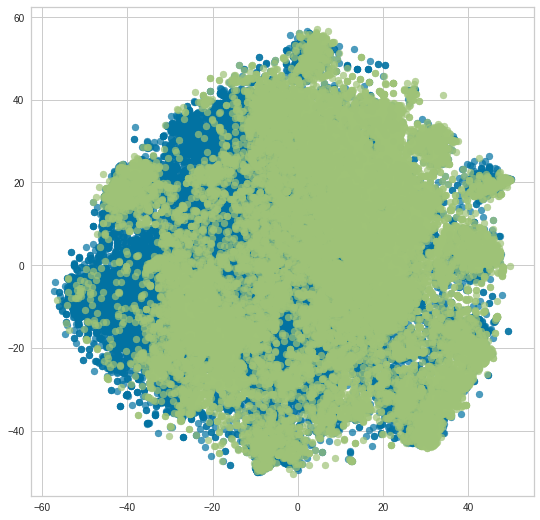

In [ ]:
from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz1 = TSNEVisualizer(colors=["tomato", "lime"],
                          random_state=123)

tsne_viz1.fit(train_data_tfidf, train_labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfd8beedd0>,
               classes=None, colormap=None, colors=['tomato', 'lime'],
               decompose=None, decompose_by=None, labels=None,
               random_state=123)

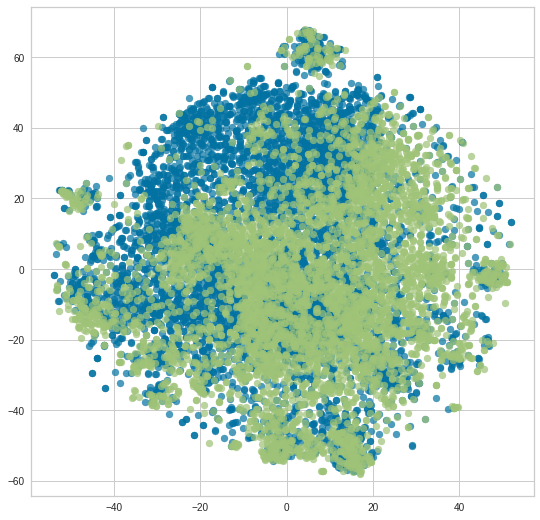

In [ ]:
from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz1 = TSNEVisualizer(colors=["tomato", "lime"],
                          random_state=123)

tsne_viz1.fit(train_data_tfidf[0:10000], train_labels[0:10000])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to spec

TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f07ccdc63d0>,
               classes=None, colormap=None, colors=['tomato', 'lime'],
               decompose=None, decompose_by=None, labels=None,
               random_state=123)

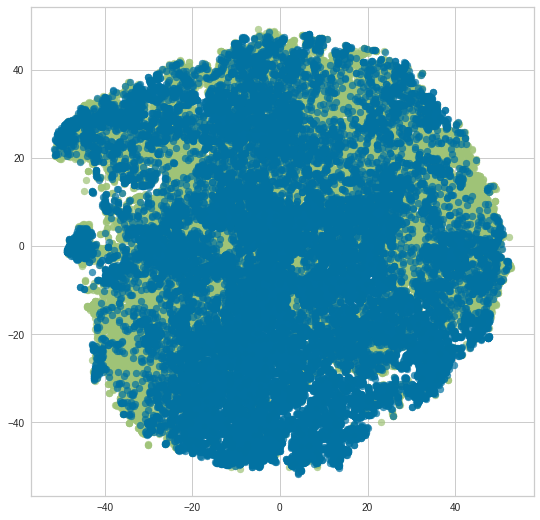

In [ ]:
from yellowbrick.text import TSNEVisualizer
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz1 = TSNEVisualizer(ax=ax,
                          decompose="svd",
                          decompose_by=10,
                          colors=["tomato", "lime"],
                          random_state=123)

tsne_viz1.fit(vectorized_reviews_tfid, labels)

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz = TSNEVisualizer(ax=ax,
                          decompose="svd",
                          decompose_by=50,
                          colors=["tomato", "lime"],
                          random_state=123)

tsne_viz.fit(vectorized_reviews_tfid, labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


TSNEVisualizer(alpha=0.7,
               ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f07bff061d0>,
               classes=None, colormap=None, colors=['tomato', 'lime'],
               decompose=None, decompose_by=None, labels=None,
               random_state=123)

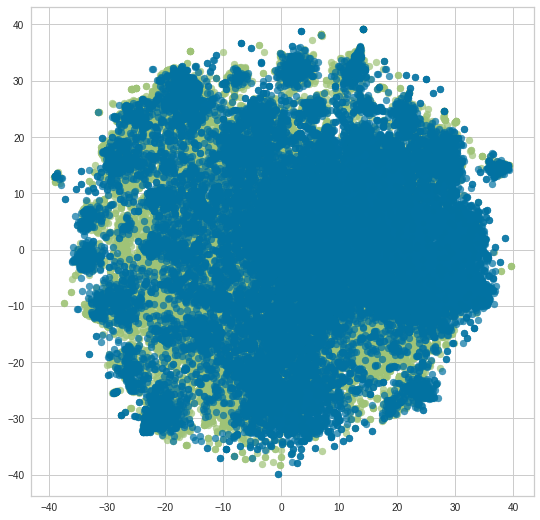

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz1 = TSNEVisualizer(ax=ax,
                          decompose="svd",
                          decompose_by=100,
                          colors=["tomato", "lime"],
                          random_state=123)

tsne_viz1.fit(vectorized_reviews_tfid, labels)

# Useful functions

In [ ]:
from sklearn import metrics
from seaborn import heatmap

def plot_heatmap(matrix, title, labels):
    heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    
def print_metrics(predictions):
    label_set = set(test_labels)
    label_names = ['negative' if label==0 else 'positive' for label in label_set]
    matrix = metrics.confusion_matrix(test_labels, predictions, labels=list(label_set))
    title = "Accuracy: {:0.2f}%".format(
        metrics.accuracy_score(test_labels, predictions) * 100)
    plot_heatmap(matrix, title, label_names)


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_count = MultinomialNB()
classifier_tfidf = MultinomialNB()

In [ ]:
classifier_count.fit(train_data_count,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
classifier_tfidf.fit(train_data_tfidf,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predictions_count = classifier_count.predict(test_data_count)

In [ ]:
predictions_tfidf = classifier_tfidf.predict(test_data_tfidf)

================== Count vectorizer ==================


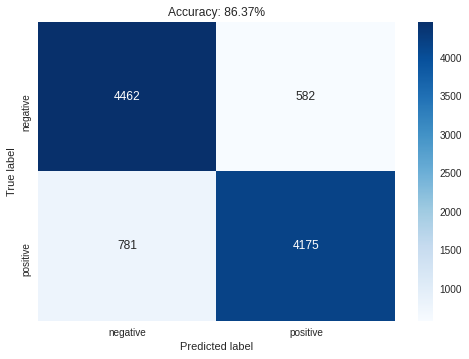

================== TFIDF vectorizer ==================


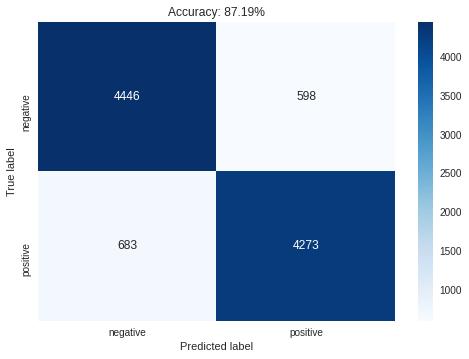

In [ ]:
print("================== Count vectorizer ==================")
print_metrics(predictions_count)
print("================== TFIDF vectorizer ==================")
print_metrics(predictions_tfidf)

## LIME

In [ ]:
! pip install lime

     |████████████████████████████████| 276kB 3.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=50c7b92e443ecf5114559d687122de2686edf4ccb4eed0b333505c656b87f4fa
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['negative', 'positive'])

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline_count = make_pipeline(count_vectorizer, classifier_count)
pipeline_tfidf = make_pipeline(tfidf_vectorizer, classifier_tfidf)

In [ ]:
def explain_prediction(review_id):
  exp_count = explainer.explain_instance(reviews[review_id], pipeline_count.predict_proba)
  exp_tfidf = explainer.explain_instance(reviews[review_id], pipeline_tfidf.predict_proba)

  print("================== Count vectorizer ==================")
  exp_count.show_in_notebook(text=True)
  print("================== TFIDF vectorizer ==================")
  exp_tfidf.show_in_notebook(text=True)

In [ ]:
df = pd.DataFrame(classifier_count.predict_proba(test_data_count))
df['diff'] = abs(df[0] - df[1])
df.sort_values('diff')

0             1      diff
9371  4.997810e-01  5.002190e-01  0.000438
6906  5.005120e-01  4.994880e-01  0.001024
4532  4.992665e-01  5.007335e-01  0.001467
9861  5.008352e-01  4.991648e-01  0.001670
5172  5.009365e-01  4.990635e-01  0.001873
...            ...           ...       ...
9154  4.177553e-21  1.000000e+00  1.000000
5036  1.000000e+00  1.432701e-27  1.000000
5027  1.000000e+00  1.366372e-24  1.000000
2189  4.029916e-40  1.000000e+00  1.000000
5443  8.397319e-20  1.000000e+00  1.000000

[10000 rows x 3 columns]

In [ ]:
explain_prediction(26350)
explain_prediction(25328)

explain_prediction(5644)
explain_prediction(1000)

Output hidden; open in https://colab.research.google.com to view.

# SVM

In [ ]:
from sklearn.svm import LinearSVC

## Hyper-parameters

In [ ]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

### Count vectorizer



In [ ]:
params = {'C': scipy.stats.expon(scale=10), 'intercept_scaling': scipy.stats.expon(scale=.1)}
grid_count2 = RandomizedSearchCV(LinearSVC(max_iter=5000), params, refit= True, verbose= 3)
grid_count2.fit(train_data_count, train_labels_count)

NameError: ignored

In [ ]:
param_results = pd.DataFrame(grid_count2.cv_results_)
param_results.sort_values("rank_test_score")

In [ ]:
import scipy
from sklearn.model_selection import RandomizedSearchCV

params = {'C': scipy.stats.expon(scale=1), 'intercept_scaling': scipy.stats.expon(scale=.1)}
grid_count2 = RandomizedSearchCV(LinearSVC(max_iter=5000), params, refit= True, verbose= 3)
grid_count2.fit(train_data_count, train_labels_count)

In [ ]:
param_results = pd.DataFrame(grid_count2.cv_results_)
param_results.sort_values('rank_test_score')

### TFIDF

In [ ]:
params = {'C': scipy.stats.expon(scale=.05), 'intercept_scaling': scipy.stats.expon(scale=.1)}
grid_tfid = RandomizedSearchCV(LinearSVC(max_iter=5000), params,n_iter=1000, refit= True, verbose= 3)
grid_tfid.fit(train_data_tfid, train_labels_tfid)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] C=0.038771126755624157, intercept_scaling=0.07890979077950344 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.038771126755624157, intercept_scaling=0.07890979077950344, score=0.889, total=   0.4s
[CV] C=0.038771126755624157, intercept_scaling=0.07890979077950344 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.038771126755624157, intercept_scaling=0.07890979077950344, score=0.892, total=   0.4s
[CV] C=0.038771126755624157, intercept_scaling=0.07890979077950344 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
[CV] C=0.15922775610319523, intercept_scaling=0.2836112240539872 .....
[CV]  C=0.15922775610319523, intercept_scaling=0.2836112240539872, score=0.897, total=   0.3s
[CV] C=0.15922775610319523, intercept_scaling=0.2836112240539872 .....
[CV]  C=0.15922775610319523, intercept_scaling=0.2836112240539872, score=0.898, total=   0.3s
[CV] C=0.15922775610319523, intercept_scaling=0.2836112240539872 .....
[CV]  C=0.15922775610319523, intercept_scaling=0.2836112240539872, score=0.898, total=   0.4s
[CV] C=0.15922775610319523, intercept_scaling=0.2836112240539872 .....
[CV]  C=0.15922775610319523, intercept_scaling=0.2836112240539872, score=0.897, total=   0.3s
[CV] C=0.15922775610319523, intercept_scaling=0.2836112240539872 .....
[CV]  C=0.15922775610319523, intercept_scaling=0.2836112240539872, score=0.900, total=   0.3s
[CV] C=0.1655774797440639, intercept_scaling=0.05943968536141614 .....
[CV]  C=0.1655774797440639, intercept_s

[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 29.5min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=5000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=1000, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4e0aaf8ad0>,
                                        'intercept_scaling': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4e0aaf8c10>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [ ]:
param_results = pd.DataFrame(grid_tfid.cv_results_)
param_results.sort_values("rank_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
58       0.344289      0.008543  ...        0.001246                1
70       0.353308      0.012987  ...        0.001534                1
77       0.355342      0.007561  ...        0.001042                1
36       0.335433      0.008397  ...        0.001322                4
26       0.350415      0.006019  ...        0.001045                5
..            ...           ...  ...             ...              ...
72       0.342242      0.005145  ...        0.003875               96
24       0.328896      0.010163  ...        0.002723               97
62       0.299438      0.014275  ...        0.004749               98
83       0.242977      0.004384  ...        0.005497               99
48       0.215546      0.005606  ...        0.007625              100

[100 rows x 15 columns]

In [ ]:
params = {'C': scipy.stats.expon(scale=.1), 'intercept_scaling': scipy.stats.expon(scale=.1)}
grid_tfid = RandomizedSearchCV(LinearSVC(max_iter=5000), params,n_iter=20, refit= True, verbose= 3)
grid_tfid.fit(train_data_tfid, train_labels_tfid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.029549934197735113, intercept_scaling=0.02764997517788667 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.029549934197735113, intercept_scaling=0.02764997517788667, score=0.887, total=   0.3s
[CV] C=0.029549934197735113, intercept_scaling=0.02764997517788667 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.029549934197735113, intercept_scaling=0.02764997517788667, score=0.889, total=   0.4s
[CV] C=0.029549934197735113, intercept_scaling=0.02764997517788667 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  C=0.029549934197735113, intercept_scaling=0.02764997517788667, score=0.883, total=   0.4s
[CV] C=0.029549934197735113, intercept_scaling=0.02764997517788667 ...
[CV]  C=0.029549934197735113, intercept_scaling=0.02764997517788667, score=0.880, total=   0.4s
[CV] C=0.029549934197735113, intercept_scaling=0.02764997517788667 ...
[CV]  C=0.029549934197735113, intercept_scaling=0.02764997517788667, score=0.885, total=   0.4s
[CV] C=0.029640546782215883, intercept_scaling=0.2082977166410779 ....
[CV]  C=0.029640546782215883, intercept_scaling=0.2082977166410779, score=0.886, total=   0.4s
[CV] C=0.029640546782215883, intercept_scaling=0.2082977166410779 ....
[CV]  C=0.029640546782215883, intercept_scaling=0.2082977166410779, score=0.888, total=   0.4s
[CV] C=0.029640546782215883, intercept_scaling=0.2082977166410779 ....
[CV]  C=0.029640546782215883, intercept_scaling=0.2082977166410779, score=0.883, total=   0.4s
[CV] C=0.029640546782215883, intercept_scaling=0.2082977166410779 ....
[

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   35.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=5000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4e0ac3d4d0>,
                                        'intercept_scaling': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4e0acc1a50>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=3)

In [ ]:
param_results = pd.DataFrame(grid_tfid.cv_results_)
param_results.sort_values("rank_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
180       0.337191      0.008480  ...        0.001040                1
5         0.324685      0.006005  ...        0.001093                2
264       0.339636      0.003358  ...        0.001439                3
825       0.347277      0.004203  ...        0.000965                4
806       0.337154      0.006440  ...        0.001117                5
..             ...           ...  ...             ...              ...
808       0.223093      0.006302  ...        0.007221              996
60        0.201328      0.017493  ...        0.007488              997
620       0.185075      0.003610  ...        0.007557              998
274       0.160114      0.004367  ...        0.007912              999
536       0.156296      0.003858  ...        0.007690             1000

[1000 rows x 15 columns]

## Training & predictions

In [ ]:
svc_classifier_count = LinearSVC(max_iter=5000, C=0.00337657, intercept_scaling=0.0526663)
svc_classifier_count.fit(train_data_count, train_labels)

LinearSVC(C=0.00337657, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=0.0526663, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svc_predictions_count = svc_classifier_count.predict(test_data_count)

In [ ]:
svc_classifier_tfidf = LinearSVC(max_iter=5000, C=0.235832, intercept_scaling=0.27264)
svc_classifier_tfidf.fit(train_data_tfidf, train_labels)

LinearSVC(C=0.235832, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=0.27264, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
svc_predictions_tfidf = svc_classifier_tfidf.predict(test_data_tfidf)

================== Count vectorizer ==================


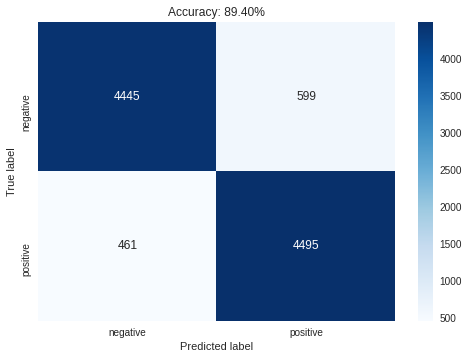

================== TFIDF vectorizer ==================


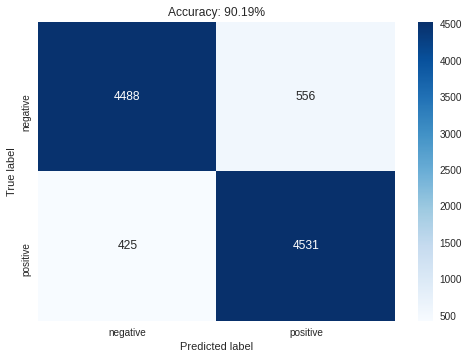

In [ ]:
print("================== Count vectorizer ==================")
print_metrics(svc_predictions_count)
print("================== TFIDF vectorizer ==================")
print_metrics(svc_predictions_tfidf)

## Visualization

Count vectorizer


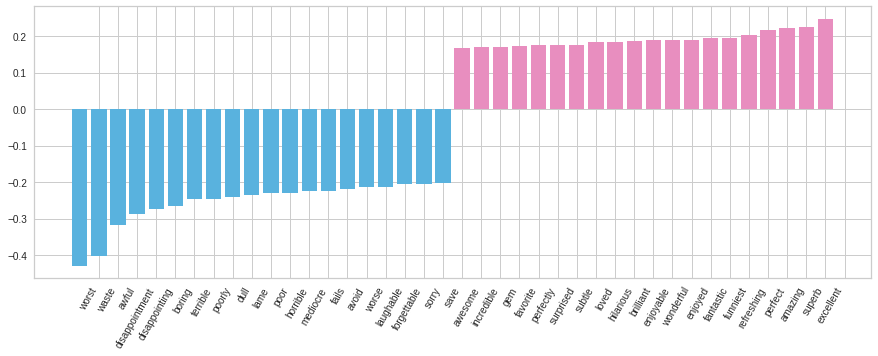

TFIDF vectorizer


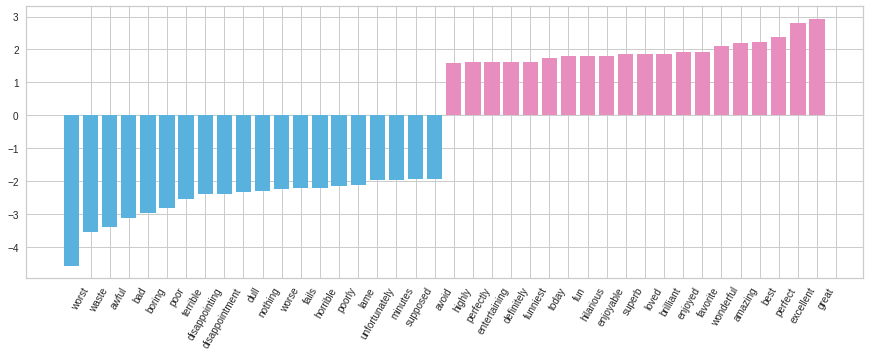

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = [blue_0 if c < 0 else pink_0 for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
print('Count vectorizer')
plot_coefficients(svc_classifier_count, count_vectorizer.get_feature_names())

print('TFIDF vectorizer')
plot_coefficients(svc_classifier_tfidf, tfidf_vectorizer.get_feature_names())

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Hyper-parameters

### TFIDF

In [ ]:
rf_params_tfidf = {
    "n_estimators": [10, 30, 100],
    # "criterion": ["gini", "entropy"],
    "max_depth": [4, 8, 16]
    # "max_features": randint(1, 3),
    # "bootstrap": [True, False],
    # "min_samples_leaf": scipy.stats.randint(1, 4)
    }
rf_search_tfiff = RandomizedSearchCV(RandomForestClassifier(), rf_params_tfidf,refit= True, verbose= 3)
rf_search_tfiff.fit(train_data_tfid, train_labels_tfid)
rf_params_results_tfidf = pd.DataFrame(rf_search_tfiff.cv_results_)
rf_params_results_tfidf.sort_values("rank_test_score")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_estimators=10, max_depth=4 ....................................
[CV] ........ n_estimators=10, max_depth=4, score=0.658, total=   0.5s
[CV] n_estimators=10, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ n_estimators=10, max_depth=4, score=0.664, total=   0.5s
[CV] n_estimators=10, max_depth=4 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ........ n_estimators=10, max_depth=4, score=0.662, total=   0.5s
[CV] n_estimators=10, max_depth=4 ....................................
[CV] ........ n_estimators=10, max_depth=4, score=0.632, total=   0.4s
[CV] n_estimators=10, max_depth=4 ....................................
[CV] ........ n_estimators=10, max_depth=4, score=0.636, total=   0.4s
[CV] n_estimators=30, max_depth=4 ....................................
[CV] ........ n_estimators=30, max_depth=4, score=0.738, total=   1.1s
[CV] n_estimators=30, max_depth=4 ....................................
[CV] ........ n_estimators=30, max_depth=4, score=0.738, total=   1.1s
[CV] n_estimators=30, max_depth=4 ....................................
[CV] ........ n_estimators=30, max_depth=4, score=0.714, total=   1.1s
[CV] n_estimators=30, max_depth=4 ....................................
[CV] ........ n_estimators=30, max_depth=4, score=0.721, total=   1.0s
[CV] n_estimators=30, max_depth=4 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.6min finished


mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
8      12.638038      0.066272  ...        0.006511                1
5       5.391365      0.023077  ...        0.003417                2
7       3.808859      0.033165  ...        0.005643                3
2       2.698285      0.016461  ...        0.009164                4
4       1.690212      0.013103  ...        0.004647                5
6       1.348970      0.021758  ...        0.009121                6
1       0.890371      0.015915  ...        0.012941                7
3       0.645047      0.010643  ...        0.017542                8
0       0.376324      0.015194  ...        0.013615                9

[9 rows x 15 columns]

In [ ]:
rf_params_tfidf = {
    "n_estimators": [10, 30, 100],
    # "criterion": ["gini", "entropy"],
    "max_depth": [4, 8, 16, 32, 64, None]
    # "max_features": randint(1, 3),
    # "bootstrap": [True, False],
    # "min_samples_leaf": scipy.stats.randint(1, 4)
    }
rf_search_tfiff = RandomizedSearchCV(RandomForestClassifier(), rf_params_tfidf,refit= True, verbose= 3)
rf_search_tfiff.fit(train_data_tfid, train_labels_tfid)
rf_params_results_tfidf = pd.DataFrame(rf_search_tfiff.cv_results_)
rf_params_results_tfidf.sort_values("rank_test_score")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=30, max_depth=16 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... n_estimators=30, max_depth=16, score=0.808, total=   4.1s
[CV] n_estimators=30, max_depth=16 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV] ....... n_estimators=30, max_depth=16, score=0.804, total=   3.9s
[CV] n_estimators=30, max_depth=16 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.0s remaining:    0.0s


[CV] ....... n_estimators=30, max_depth=16, score=0.801, total=   4.0s
[CV] n_estimators=30, max_depth=16 ...................................
[CV] ....... n_estimators=30, max_depth=16, score=0.806, total=   4.0s
[CV] n_estimators=30, max_depth=16 ...................................
[CV] ....... n_estimators=30, max_depth=16, score=0.807, total=   4.0s
[CV] n_estimators=100, max_depth=32 ..................................
[CV] ...... n_estimators=100, max_depth=32, score=0.851, total=  34.0s
[CV] n_estimators=100, max_depth=32 ..................................
[CV] ...... n_estimators=100, max_depth=32, score=0.849, total=  34.2s
[CV] n_estimators=100, max_depth=32 ..................................
[CV] ...... n_estimators=100, max_depth=32, score=0.844, total=  34.2s
[CV] n_estimators=100, max_depth=32 ..................................
[CV] ...... n_estimators=100, max_depth=32, score=0.842, total=  34.8s
[CV] n_estimators=100, max_depth=32 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.8min finished


mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
1      33.580519      0.428141  ...        0.003589                1
8      25.376777      0.394114  ...        0.003410                2
2      10.067842      0.203209  ...        0.006081                3
0       3.826312      0.045431  ...        0.002468                4
4       2.661663      0.015533  ...        0.008018                5
5       8.431501      0.133605  ...        0.004591                6
3       1.672350      0.015703  ...        0.006997                7
9      15.560036      0.122670  ...        0.004480                8
7       1.313803      0.011445  ...        0.014299                9
6       0.628300      0.007525  ...        0.009585               10

[10 rows x 15 columns]

### Count vectorizer

In [ ]:
rf_params_count = {
    "n_estimators": [10, 30, 100],
    # "criterion": ["gini", "entropy"],
    "max_depth": [4, 8, 16, 32, 64, None]
    # "max_features": randint(1, 3),
    # "bootstrap": [True, False],
    # "min_samples_leaf": scipy.stats.randint(1, 4)
    }
rf_search_count = RandomizedSearchCV(RandomForestClassifier(), rf_params_count,refit= True, verbose= 3)
rf_search_count.fit(train_data_tfid, train_labels_tfid)
rf_params_results_count = pd.DataFrame(rf_search_count.cv_results_)
rf_params_results_count.sort_values("rank_test_score")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... n_estimators=100, max_depth=4, score=0.808, total=   3.2s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] ....... n_estimators=100, max_depth=4, score=0.796, total=   3.1s
[CV] n_estimators=100, max_depth=4 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ....... n_estimators=100, max_depth=4, score=0.786, total=   3.1s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] ....... n_estimators=100, max_depth=4, score=0.795, total=   3.1s
[CV] n_estimators=100, max_depth=4 ...................................
[CV] ....... n_estimators=100, max_depth=4, score=0.797, total=   3.1s
[CV] n_estimators=10, max_depth=32 ...................................
[CV] ....... n_estimators=10, max_depth=32, score=0.767, total=   3.4s
[CV] n_estimators=10, max_depth=32 ...................................
[CV] ....... n_estimators=10, max_depth=32, score=0.775, total=   3.4s
[CV] n_estimators=10, max_depth=32 ...................................
[CV] ....... n_estimators=10, max_depth=32, score=0.763, total=   3.5s
[CV] n_estimators=10, max_depth=32 ...................................
[CV] ....... n_estimators=10, max_depth=32, score=0.768, total=   3.6s
[CV] n_estimators=10, max_depth=32 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.2min finished


NameError: ignored

In [ ]:
rf_params_count = {
    "n_estimators": [300, 1000],
    # "criterion": ["gini", "entropy"],
    "max_depth": [4, 8, 16, 32, 64, None]
    # "max_features": randint(1, 3),
    # "bootstrap": [True, False],
    # "min_samples_leaf": scipy.stats.randint(1, 4)
    }
rf_search_count = RandomizedSearchCV(RandomForestClassifier(), rf_params_count,refit= True, verbose= 3)
rf_search_count.fit(train_data_tfid, train_labels_tfid)
rf_params_results_count = pd.DataFrame(rf_search_count.cv_results_)
rf_params_results_count.sort_values("rank_test_score")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, max_depth=4 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_estimators=1000, max_depth=4, score=0.836, total=  30.0s
[CV] n_estimators=1000, max_depth=4 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.0s remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=4, score=0.842, total=  30.2s
[CV] n_estimators=1000, max_depth=4 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


[CV] ...... n_estimators=1000, max_depth=4, score=0.832, total=  30.0s
[CV] n_estimators=1000, max_depth=4 ..................................
[CV] ...... n_estimators=1000, max_depth=4, score=0.837, total=  30.0s
[CV] n_estimators=1000, max_depth=4 ..................................
[CV] ...... n_estimators=1000, max_depth=4, score=0.836, total=  29.8s
[CV] n_estimators=1000, max_depth=8 ..................................
[CV] ...... n_estimators=1000, max_depth=8, score=0.847, total=  56.1s
[CV] n_estimators=1000, max_depth=8 ..................................
[CV] ...... n_estimators=1000, max_depth=8, score=0.848, total=  56.1s
[CV] n_estimators=1000, max_depth=8 ..................................
[CV] ...... n_estimators=1000, max_depth=8, score=0.839, total=  56.3s
[CV] n_estimators=1000, max_depth=8 ..................................
[CV] ...... n_estimators=1000, max_depth=8, score=0.843, total=  56.2s
[CV] n_estimators=1000, max_depth=8 ..................................
[CV] .

In [ ]:
rf_params_results_count = pd.DataFrame(rf_search_count.cv_results_)
rf_params_results_count.sort_values("rank_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
9      82.320845      0.899796  ...        0.004591                1
2      12.486724      0.074786  ...        0.004252                2
5      24.962076      0.289348  ...        0.004473                3
3      45.335420      0.907077  ...        0.003506                4
8       9.820372      0.095779  ...        0.003268                5
0       2.680640      0.031107  ...        0.006836                6
7       8.374199      0.126814  ...        0.006259                7
1       3.420761      0.083865  ...        0.004205                8
6       1.362471      0.018314  ...        0.005550                9
4       0.896349      0.007250  ...        0.010584               10

[10 rows x 15 columns]

## Training and predictions

In [ ]:
# random_forest_count = RandomForestClassifier(n_estimators = 1000, max_depth=64, verbose=True)
# random_forest_count.fit(train_data_count, train_labels)
# joblib.dump(random_forest_count, "random_forest_count.joblib")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 13.8min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=64, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [ ]:
import joblib
random_forest_count = joblib.load("drive/MyDrive/random_forest_count.joblib")

In [ ]:
# random_forest_tfidf = RandomForestClassifier(criterion='entropy', n_estimators=1000, max_depth=64, verbose=True)
# random_forest_tfidf.fit(train_data_tfidf, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 12.6min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=64, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [ ]:
random_forest_predictions_count = random_forest_count.predict(test_data_count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.1s finished


In [ ]:
random_forest_tfidf = joblib.load("drive/MyDrive/random_forest_tfidf.joblib")

In [ ]:
random_forest_predictions_tfidf = random_forest_tfidf.predict(test_data_tfidf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    8.4s finished


================== Count vectorizer ==================


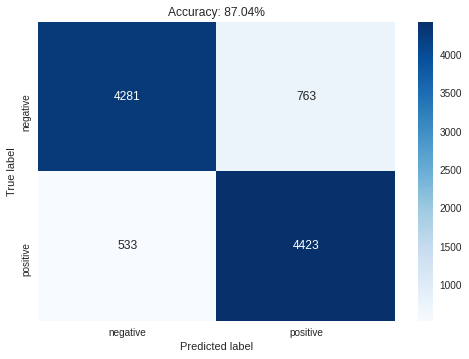

In [ ]:
print("================== Count vectorizer ==================")
print_metrics(random_forest_predictions_count)

================== TFIDF vectorizer ==================


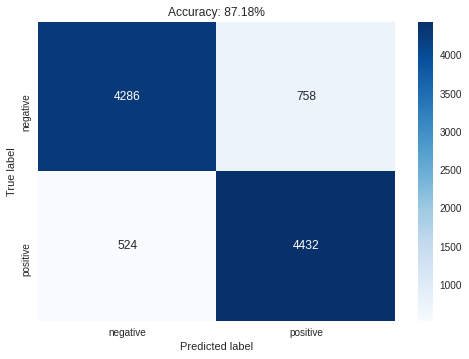

In [ ]:
print("================== TFIDF vectorizer ==================")
print_metrics(random_forest_predictions_tfidf)

## Max depth limited to 32

In [ ]:
random_forest_count_faster = RandomForestClassifier(n_estimators = 1000, max_depth=32, verbose=True)
random_forest_count_faster.fit(train_data_count, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.9min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=32, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [ ]:
random_forest_predictions_count_faster = random_forest_count_faster.predict(test_data_count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.1s finished


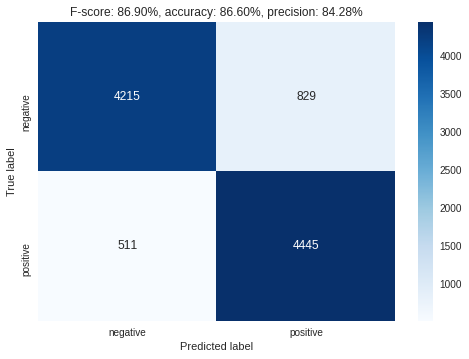

In [ ]:
print_metrics(random_forest_predictions_count_faster)

## Feature importance

In [ ]:
def plot_feature_importance(model, vectorizer):
  feature_importance = np.array(model.feature_importances_)
  feature_names = np.array(vectorizer.get_feature_names())
  data = pd.DataFrame({'feature_names': feature_names, 'feature_importance': feature_importance})
  
  
  max_data = data.nlargest(20, ['feature_importance'])
  
  max_data.plot(kind='barh', x='feature_names', y='feature_importance', color=blue_0)
  plt.show()

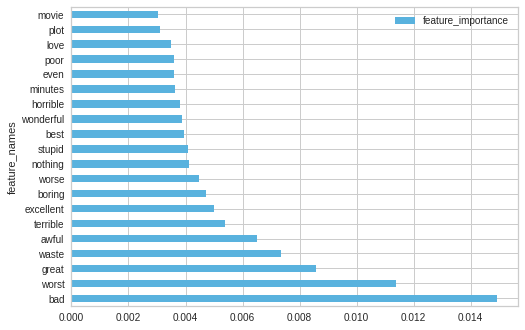

In [ ]:
plot_feature_importance(random_forest_count, count_vectorizer)

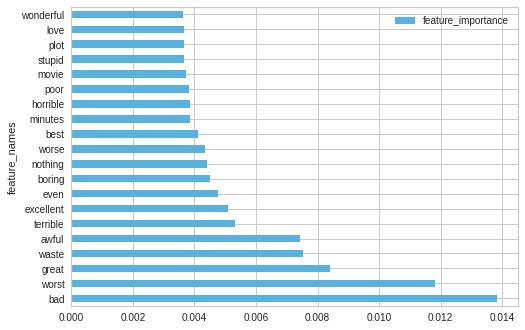

In [ ]:
plot_feature_importance(random_forest_tfidf, tfidf_vectorizer)

## LIME

In [ ]:
random_forest_pipeline_count = make_pipeline(count_vectorizer, random_forest_count)
random_forest_pipeline_tfidf = make_pipeline(tfidf_vectorizer, random_forest_tfidf)

In [ ]:
def explain_random_forest_prediction(review_id):
  exp_count = explainer.explain_instance(reviews[review_id], random_forest_pipeline_count.predict_proba)
  exp_tfidf = explainer.explain_instance(reviews[review_id], random_forest_pipeline_tfidf.predict_proba)

  print("Count vectorizer")
  exp_count.show_in_notebook(text=True)
  print("TFID vectorizer")
  exp_tfidf.show_in_notebook(text=True)

In [ ]:
explain_random_forest_prediction(26350)
explain_random_forest_prediction(25328)

explain_random_forest_prediction(5644)
explain_random_forest_prediction(1000)

Output hidden; open in https://colab.research.google.com to view.

## Plot tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
def plot_random_forest_tree():
  plt.figure(figsize=(120,120)) 

  plot_tree(random_forest_count.estimators_[0], 
                  feature_names = count_vectorizer.get_feature_names(),
                  max_depth = 6,
                  class_names = ['negative', 'positive'],
                  rounded = True, proportion = False, 
                  precision = 2, filled = True)
  plt.show()

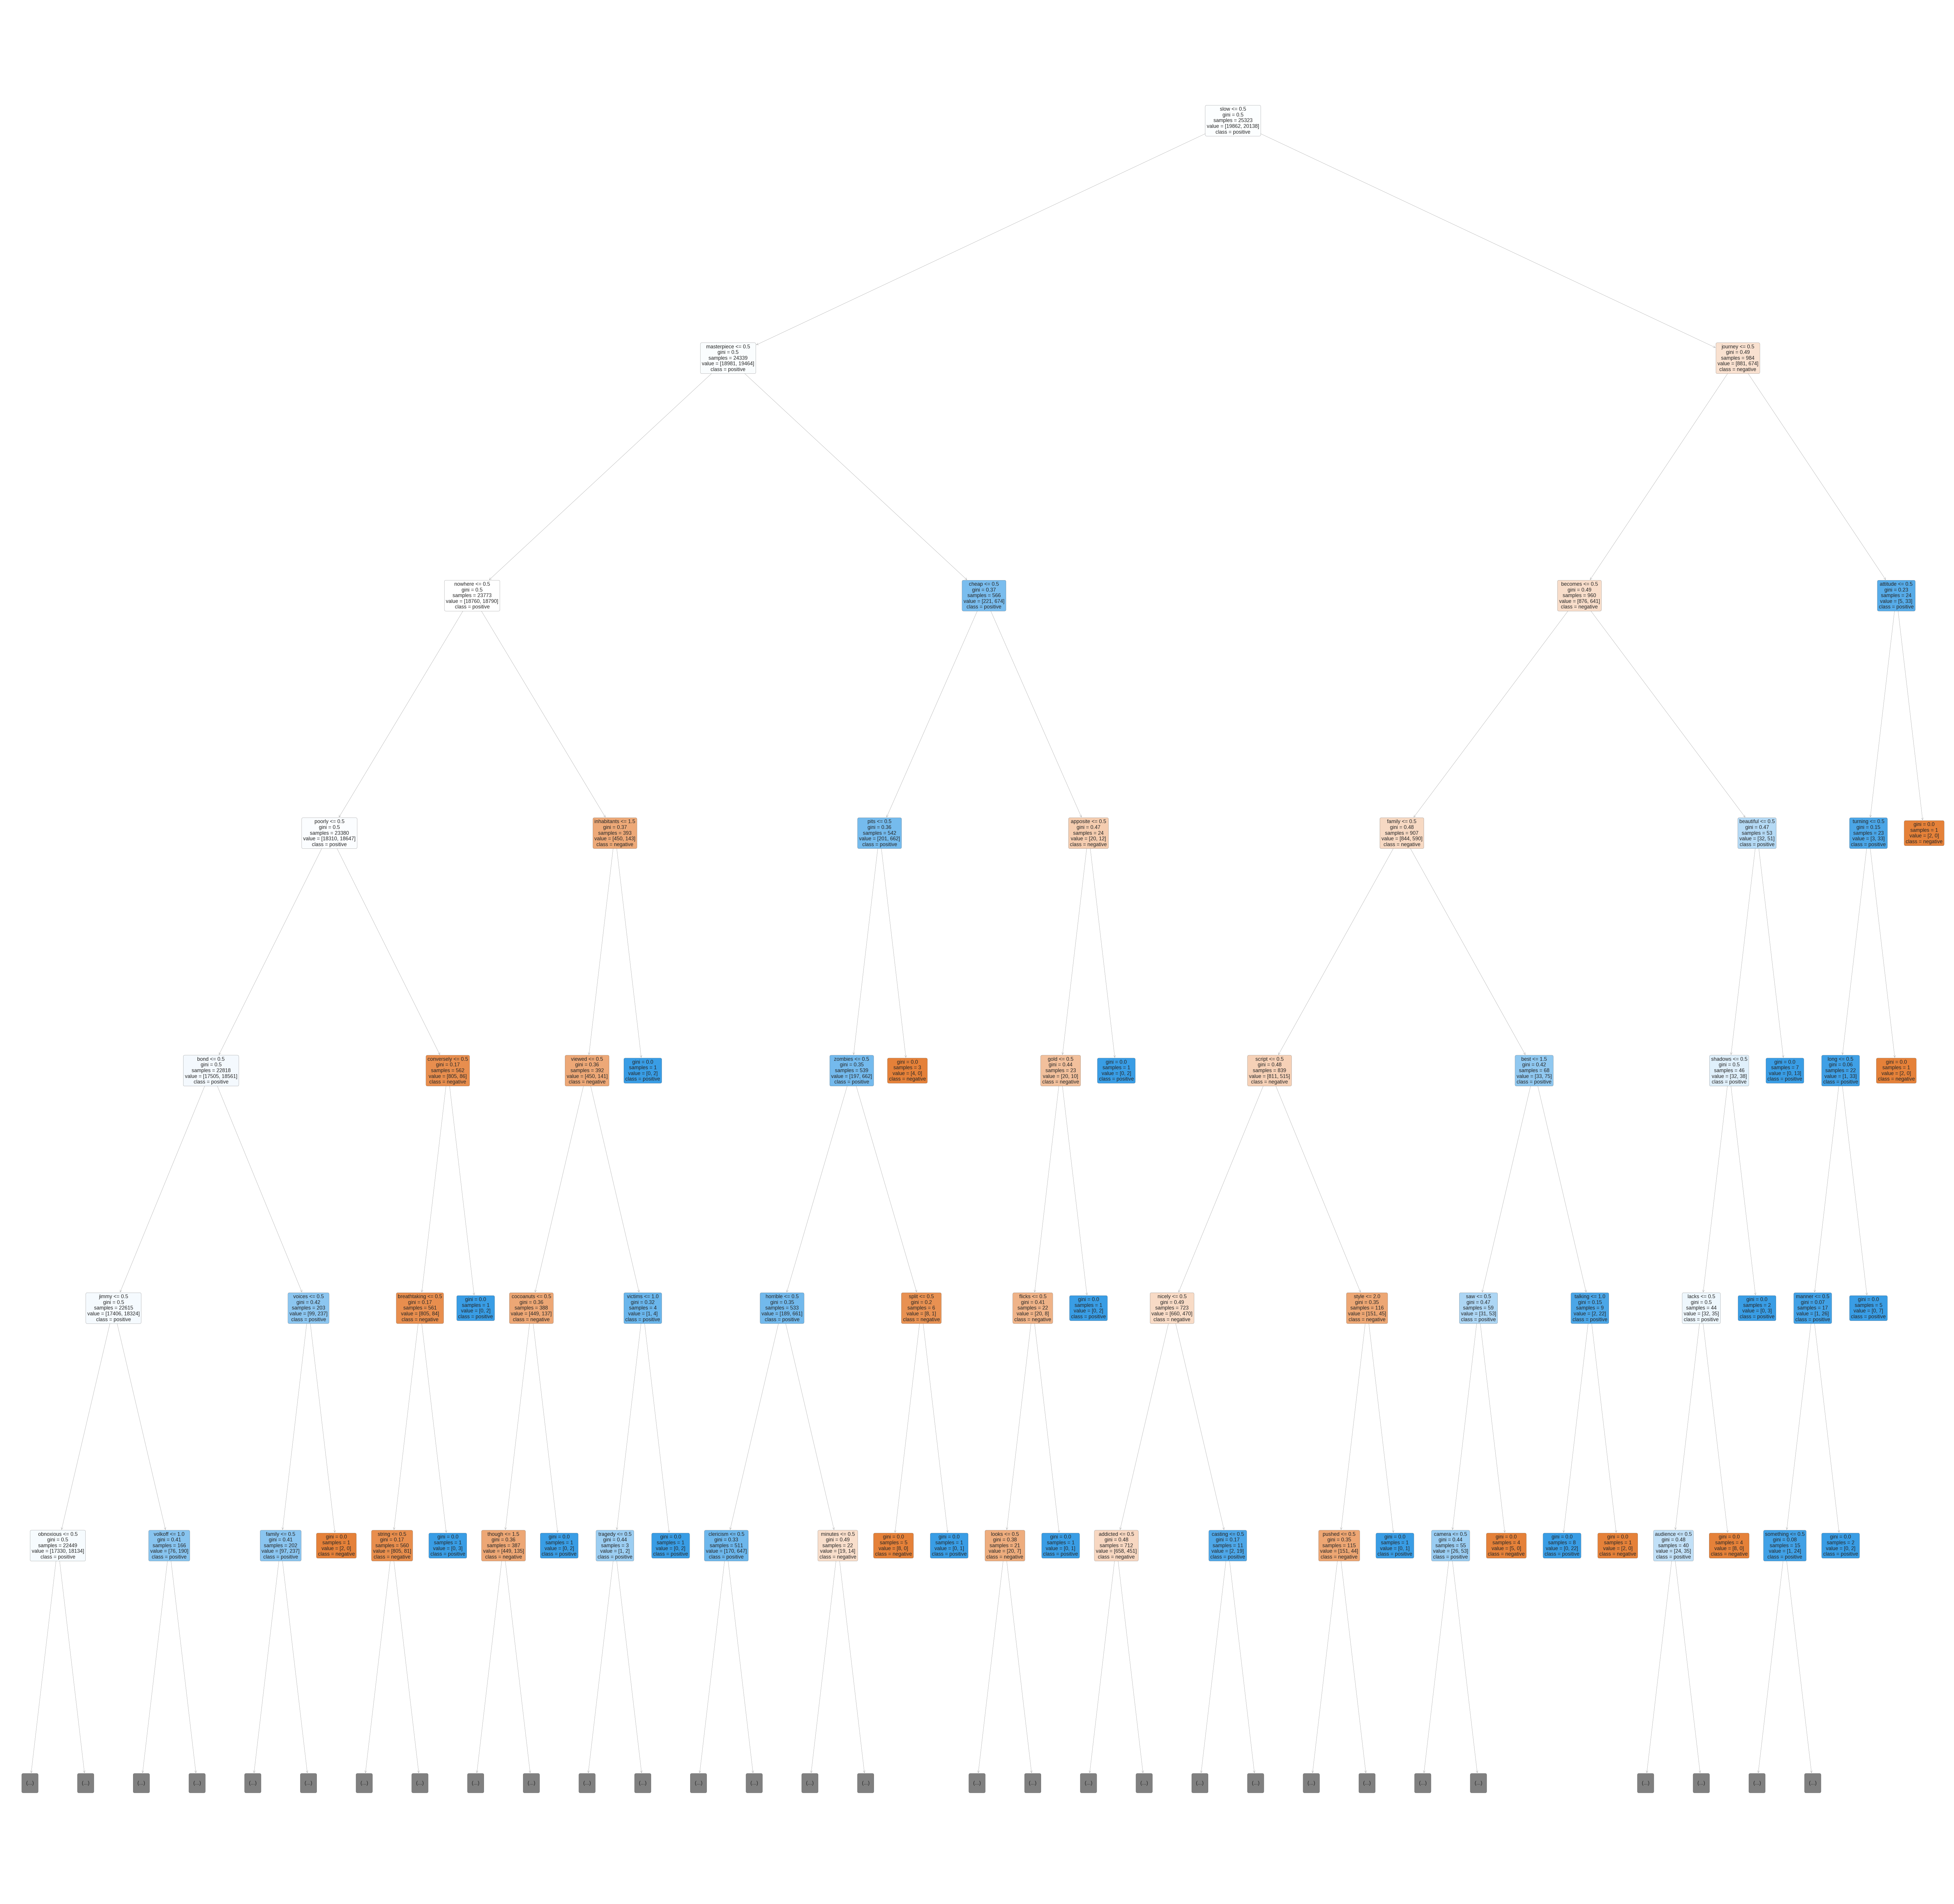

In [ ]:
plot_random_forest_tree()

# Word2vec

In [ ]:
import re
def get_lists_of_words(data):
  clean_reviews = data.map(lambda review: re.sub(r'([^a-z|\s])+', '', review.lower()))
  return [review.split() for review in clean_reviews]

In [ ]:
train_data_list_of_words = get_lists_of_words(train_data)

In [ ]:
train_data_list_of_words

[['this',
  'film',
  'has',
  'been',
  'compared',
  'to',
  'the',
  'hilarious',
  'british',
  'comedy',
  'a',
  'fish',
  'called',
  'wanda',
  'although',
  'i',
  'cant',
  'see',
  'why',
  'the',
  'only',
  'connection',
  'i',
  'can',
  'find',
  'is',
  'the',
  'monty',
  'python',
  'one',
  'eric',
  'idle',
  'in',
  'nuns',
  'john',
  'cleese',
  'and',
  'michael',
  'palin',
  'in',
  'wanda',
  'otherwise',
  'the',
  'two',
  'are',
  'incomparableidle',
  'and',
  'robbie',
  'coltrane',
  'are',
  'two',
  'gangsters',
  'who',
  'want',
  'to',
  'get',
  'out',
  'of',
  'the',
  'business',
  'before',
  'they',
  'end',
  'up',
  'dead',
  'so',
  'they',
  'decide',
  'to',
  'rip',
  'off',
  'their',
  'boss',
  'and',
  'make',
  'for',
  'rio',
  'when',
  'the',
  'getaway',
  'goes',
  'wrong',
  'the',
  'two',
  'are',
  'forced',
  'to',
  'take',
  'refuge',
  'in',
  'a',
  'convent',
  'as',
  'nunswhat',
  'at',
  'first',
  'promises',
  '

In [ ]:
# import gensim
# embed_size = 150
# word2vec_model = gensim.models.Word2Vec (train_data_list_of_words, size=embed_size, window=10, min_count=2, workers=10)
# word2vec_model.train(train_data_list_of_words,total_examples=len(train_data_list_of_words),epochs=10)

(67259016, 90300780)

In [ ]:
import gensim
embed_size = 150
word2vec_model = gensim.models.Word2Vec.load('drive/MyDrive/model')

In [ ]:
word2vec_model.wv.most_similar('actor')

[('actress', 0.5977960824966431),
 ('performer', 0.5925692915916443),
 ('role', 0.5761367678642273),
 ('comedian', 0.5694815516471863),
 ('performance', 0.5201245546340942),
 ('newcomer', 0.4978533387184143),
 ('actors', 0.4970739483833313),
 ('impersonation', 0.47669658064842224),
 ('thespian', 0.47024333477020264),
 ('foxx', 0.46994471549987793)]

In [ ]:
word2vec_model.wv.doesnt_match(['good', 'nice','small', 'fine'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'small'

### Visualization

In [ ]:
word_vectors = pd.DataFrame(word2vec_model[word2vec_model.wv.vocab], word2vec_model.wv.vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
word_vectors

0         1         2    ...       147       148       149
one          -0.068556 -0.535242 -1.211615  ...  4.212045 -2.495354 -2.315618
of            2.456316  0.236809 -1.864299  ... -0.497862  1.461353  2.070049
the          -1.027304 -0.736920 -0.374283  ...  0.496981 -0.552784 -0.906909
other         2.221614  2.065059 -2.451320  ...  0.037189  0.119960 -3.079442
reviewers    -1.328646  1.123452 -0.757079  ...  3.968311 -0.475326  0.407972
...                ...       ...       ...  ...       ...       ...       ...
misleadingly -0.095670 -0.119967  0.011220  ... -0.045261  0.019793  0.031619
crosswords    0.041168  0.081060 -0.009382  ... -0.004797  0.099627 -0.061112
kommodo       0.040535  0.114987 -0.049551  ...  0.129244 -0.101720  0.127185
morenos      -0.063756  0.102196  0.003643  ...  0.160166 -0.090040 -0.023652
cattral       0.159017  0.023895  0.084336  ...  0.061408 -0.086801  0.026689

[81589 rows x 150 columns]

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity = 30, n_components=2, init='pca', n_iter=50000, method='exact')tsne = TSNE(perplexity = 30, n_components=2, init='pca', n_iter=50000, method='exact')

In [ ]:
points = tsne.fit_transform(np.array(word_vectors)[1000:1500,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # This is added back by InteractiveShellApp.init_path()


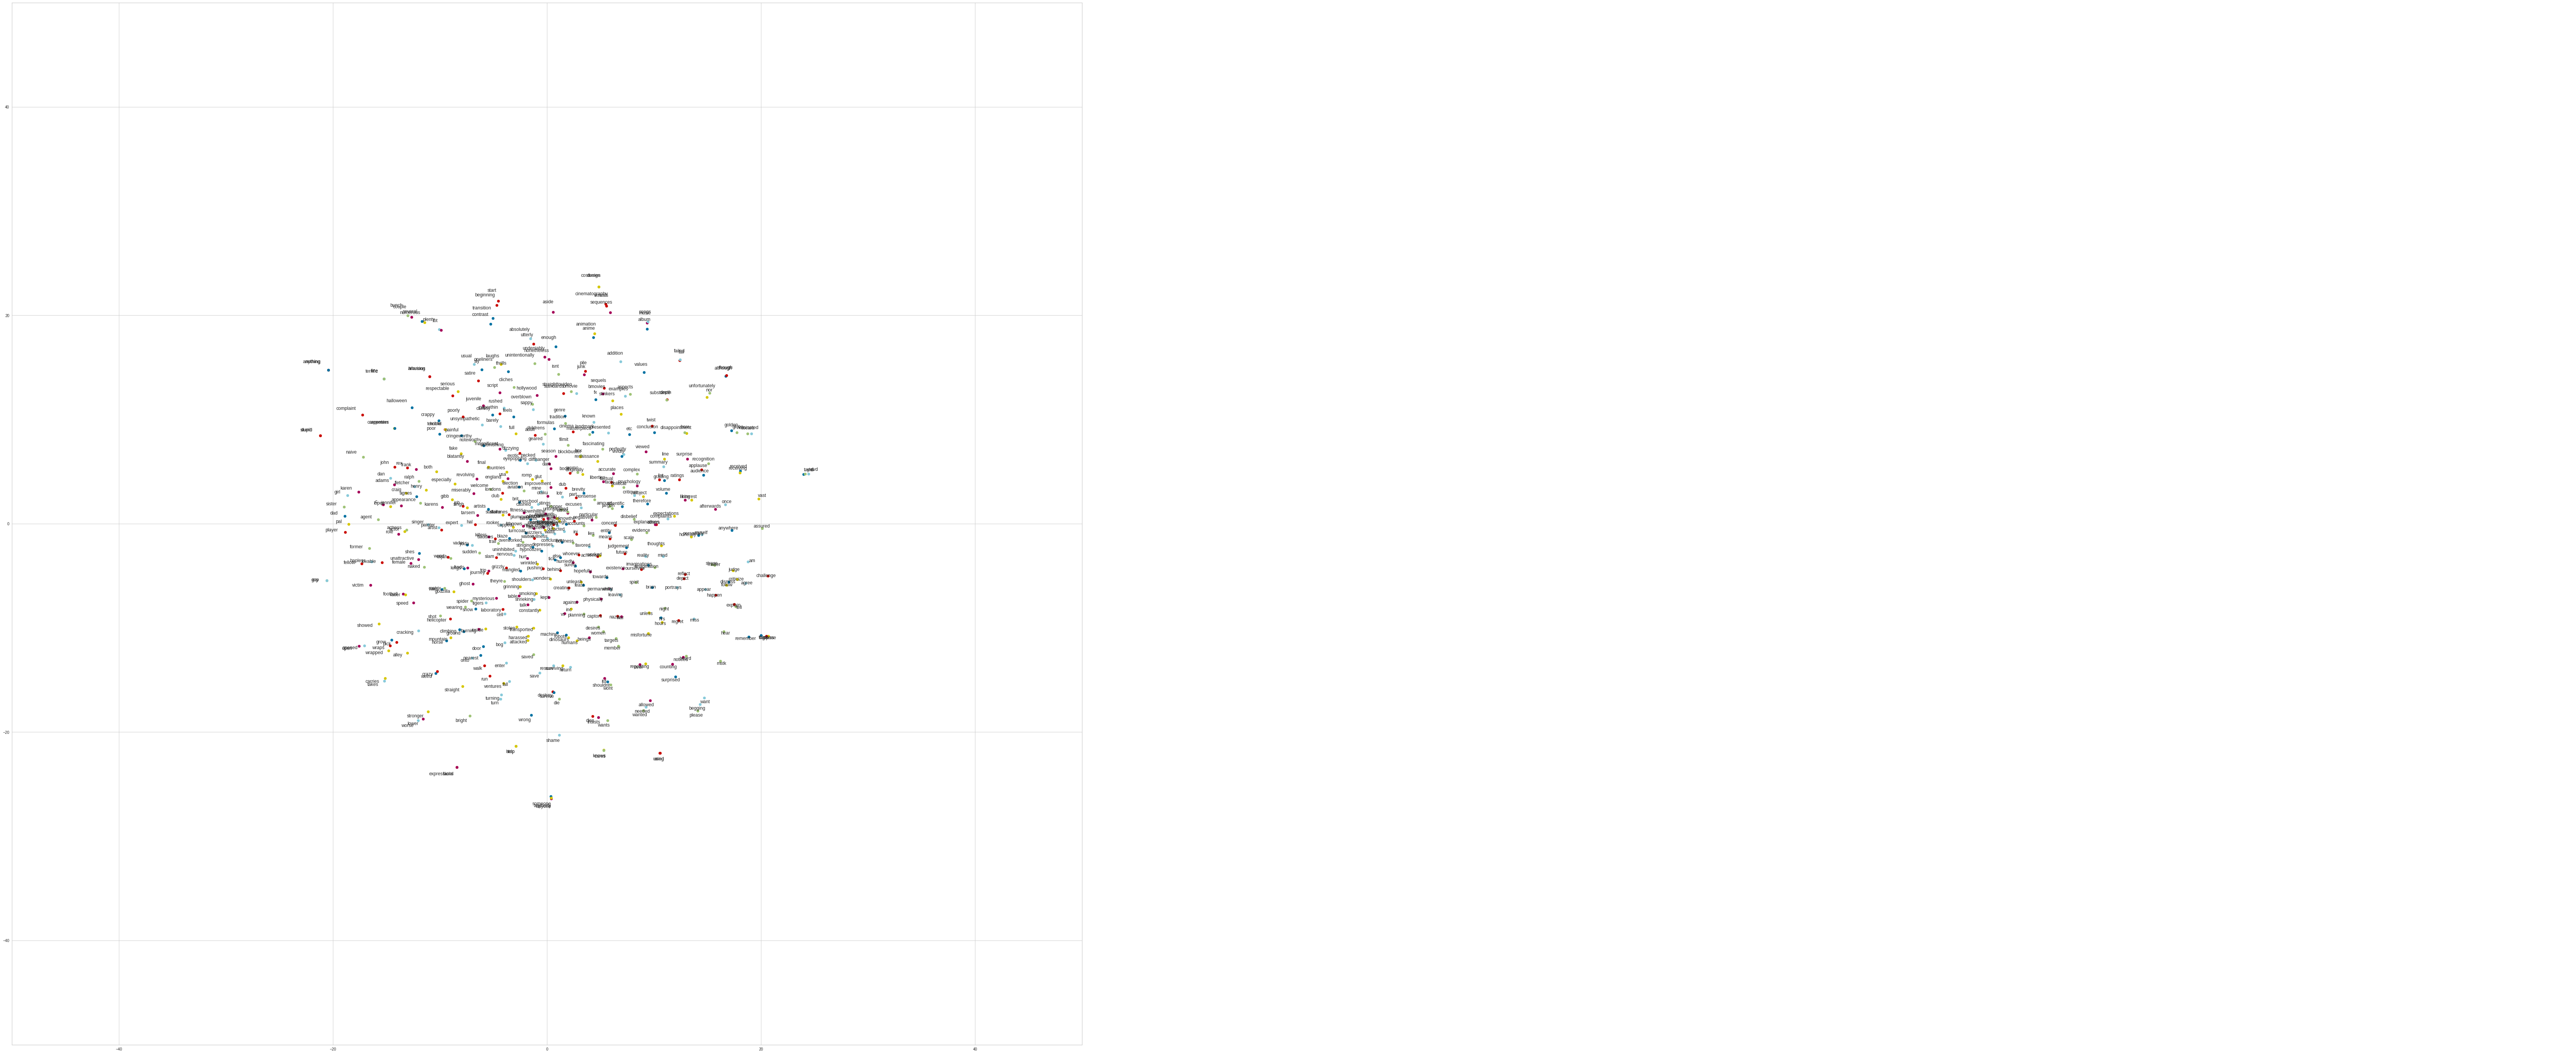

In [ ]:
def plot(points, labels):
  plt.figure(figsize=(50,50))
  size = 50
  plt.xlim(-size,size)
  plt.ylim(-size, size)

  for i, label in enumerate(labels):
    x, y = points[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), textcoords='offset points', ha='right', va='bottom')
  
  plt.show()

plot(points[:,:], list(model.wv.vocab)[1000:1500])

## Review lengths

In [ ]:
lengths = [len(words) for words in train_data_list_of_words]

In [ ]:
def plot_with_percentiles(array):
  plt.hist(array,100, linestyle='solid', color=blue_0)
  min_ylim, max_ylim = plt.ylim()

  def draw_percentile(percentile):
    value = np.percentile(array, percentile)
    plt.axvline(value, linestyle='dashed', linewidth=1)
    plt.text(value*1.1, max_ylim*(100-percentile)/100, '{} percentile: {:.0f}'.format(percentile, value))

  draw_percentile(50)
  draw_percentile(75)
  draw_percentile(90)
  plt.show()

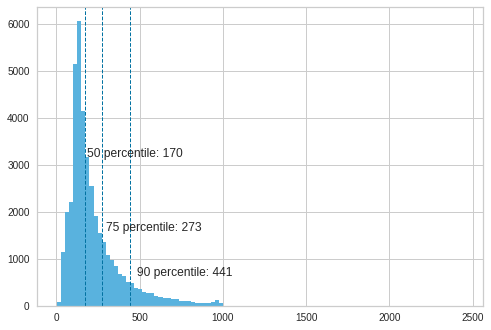

In [ ]:
plot_with_percentiles(lengths)

## Data preparation

In [ ]:
import numpy as np

In [ ]:
review_length_lim = 273
embedding_matrix_size = len(word2vec_model.wv.vectors)

def pad_with_zeros(vec):
  return np.array(np.pad(vec, (0, review_length_lim -len(vec)), constant_values=(273,273)))

def get_word_indices(review):
  return [word2vec_model.wv.vocab[word].index if word in word2vec_model.wv.vocab else embedding_matrix_size for word in review[0:review_length_lim]]


def get_data_matrix(data):
  data_list_of_words = get_lists_of_words(data)
  return np.array(
    [pad_with_zeros(get_word_indices(review)).astype('int') 
    for review in data_list_of_words])

train_data_matrix = get_data_matrix(train_data)
test_data_matrix = get_data_matrix(test_data)

In [ ]:
train_data_matrix

array([[    9,    17,    41, ...,   273,   273,   273],
       [ 3549,  1169, 72628, ...,   273,   273,   273],
       [    0,  2740,    14, ...,   273,   273,   273],
       ...,
       [   31,  1010, 22014, ...,   273,   273,   273],
       [ 1111,  2437,     3, ...,   336,    54,   821],
       [  279,     6,  1404, ...,   273,   273,   273]])

In [ ]:
train_data_matrix.shape

(40000, 273)

In [ ]:
embedding_matrix = np.zeros((embedding_matrix_size + 1, embed_size))
embedding_matrix[:-1,:] = word2vec_model.wv.vectors
embedding_matrix

array([[ 1.22403324, -0.39561233,  0.62494844, ...,  0.95050406,
        -1.25998557, -0.54395837],
       [-1.13659239,  1.00205934,  0.09697308, ...,  0.4272877 ,
        -0.72025687, -1.42889547],
       [-0.60070109, -0.36350301, -0.48237991, ..., -0.43521947,
         0.29972726,  0.51187426],
       ...,
       [-0.01645177,  0.00266647,  0.00477755, ..., -0.04363185,
        -0.04871318,  0.06608091],
       [ 0.10186021, -0.01823639,  0.02099335, ..., -0.06666604,
         0.01225034, -0.06852124],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Convolutional neural network

In [ ]:
import keras
from keras.models import Sequential
from keras import layers

In [ ]:
def cnn_model():
  model = Sequential()
  model.add(layers.Embedding(embedding_matrix_size + 1, embed_size, weights=[embedding_matrix]))
  model.add(layers.Conv1D(128, 5, activation='relu'))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  print(model.summary())
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
cnn_model = cnn_model().fit(train_data_matrix, train_labels,
                    epochs=8,
                    verbose=True,
                    batch_size=100)
cnn_model.model.save('drive/MyDrive/cnn_model_4')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 150)         10894350  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 128)         96128     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 10,991,779
Trainable params: 10,991,779
Non-trainable params: 0
__________________________________________

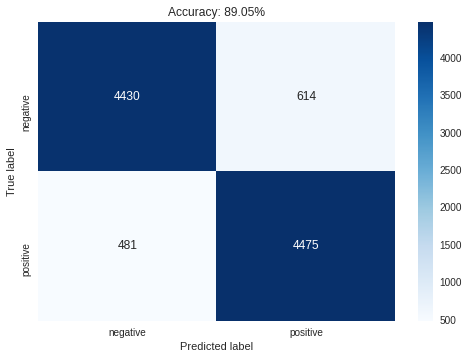

In [ ]:
# cnn_model = keras.models.load_model('drive/MyDrive/cnn_model') 89.37
cnn_model = keras.models.load_model('drive/MyDrive/cnn_model_4')
cnn_predictions = cnn_model.predict_classes(test_data_matrix)

print_metrics(cnn_predictions)

# Long short-term memory

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 150)         10894350  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               142848    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 11,037,327
Trainable params: 11,037,327
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/8
400/400 [==============================] - 511s 1s/step - loss: 0.6561 - accuracy: 0.5894
Epoch 2/8
400/400 [==============================] - 489s 1s/step - loss: 0.4052 - accuracy: 0.8376
Epoch 3/8
400/400 [==============================] - 492s 1s/step - loss: 0.2851 - accuracy: 0.8852
Epoch 4/8
400/400 [==============================] - 506s 1s/step -

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


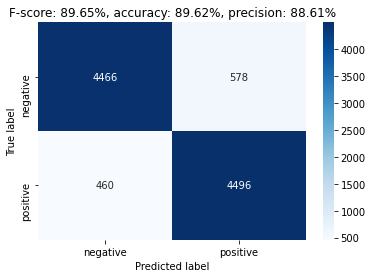

In [ ]:

def model_lstsm():
model = Sequential()
  model.add(layers.Embedding(embedding_matrix_size + 1, embed_size, weights=[embedding_matrix]))
  model.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
  model.add(layers.Dense(1, activation='sigmoid'))
  print(model.summary())
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


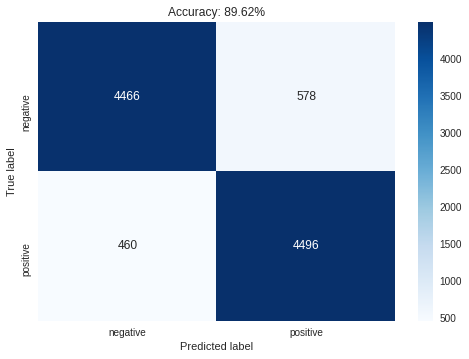

In [ ]:
lstm_model = keras.models.load_model('drive/MyDrive/lstm_model_v1')
lstm_predictions = lstm_model.predict_classes(test_data_matrix)

print_metrics(lstm_predictions)

# CNN-LSTM Ensemble

In [ ]:
cnn_lstm_predictions = pd.DataFrame(cnn_prediction_scores, columns=['CNN'], index= range(0,len(test_data)))
cnn_lstm_predictions['LSTM'] = pd.DataFrame(lstm_prediction_scores, index= range(0,len(test_data)))
cnn_lstm_predictions['AVG'] = cnn_lstm_predictions.mean(axis=1)
cnn_lstm_predictions['Prediction'] = np.where(cnn_lstm_predictions['AVG']>0.5, 1, 0)
cnn_lstm_predictions

CNN      LSTM       AVG  Prediction
0     0.022887  0.014921  0.018904  0         
1     0.001879  0.005352  0.003615  0         
2     0.002172  0.055093  0.028632  0         
3     0.001252  0.004988  0.003120  0         
4     0.996383  0.957806  0.977094  1         
...        ...       ...       ... ..         
9995  0.962416  0.423818  0.693117  1         
9996  0.375081  0.976883  0.675982  1         
9997  0.716057  0.990365  0.853211  1         
9998  0.998739  0.995708  0.997223  1         
9999  0.003713  0.005129  0.004421  0         

[10000 rows x 4 columns]

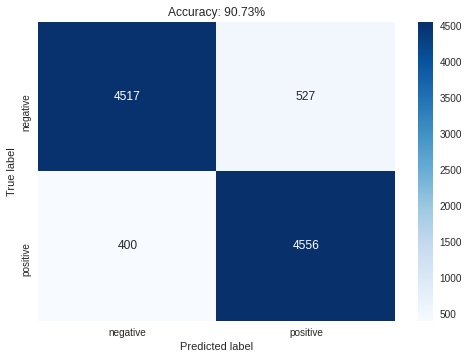

In [ ]:
print_metrics(cnn_lstm_predictions['Prediction'])

# Models comparision

In [ ]:
def get_metrics(predictions):
    metric_rows = []
    for model_name, vectorizer, prediction in predictions:
      metric_rows.append({'Model name': model_name, 'Vectorizer': vectorizer,
        'Accuracy': metrics.accuracy_score(test_labels, prediction) * 100}        
        )
    return pd.DataFrame(metric_rows).set_index(['Model name', 'Vectorizer'])

In [ ]:
predictions = [('Naive Bayes', 'TF-IDF', predictions_tfidf), ('Naive Bayes', 'Count', predictions_count), 
          ('SVM', 'TF-IDF', svc_predictions_tfidf), ('SVM', 'Count', svc_predictions_count),
          ('Random forest', 'TF-IDF', random_forest_predictions_tfidf), ('Random forest', 'Count', random_forest_predictions_count), 
          ('CNN', 'Word2vec', cnn_predictions), ('LSTM', 'Word2vec', lstm_predictions), ('CNN-LSTM Ensemble', 'Word2vec', cnn_lstm_predictions['Prediction'].values)]

model_metrics = get_metrics(predictions)
model_metrics

Accuracy
Model name        Vectorizer          
Naive Bayes       TF-IDF      87.19   
                  Count       86.37   
SVM               TF-IDF      90.19   
                  Count       89.40   
Random forest     TF-IDF      87.18   
                  Count       87.04   
CNN               Word2vec    89.05   
LSTM              Word2vec    89.62   
CNN-LSTM Ensemble Word2vec    90.73

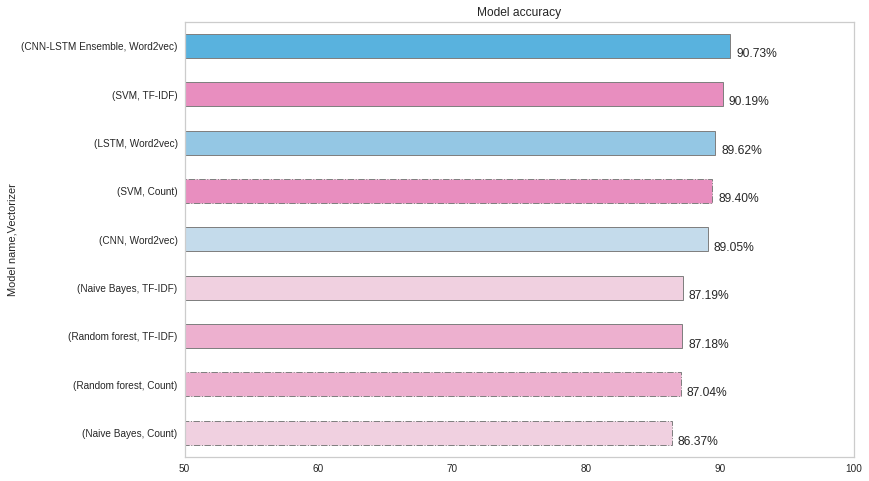

In [ ]:
def metrics_plot(model_metrics):
  plt.figure(figsize=(12, 8))
  data_frame = model_metrics['Accuracy'].sort_values()
  ax = data_frame.plot( kind='barh')
  ax.set_xlim(50,100)
  ax.set_title('Model accuracy')

  for p, i in zip(ax.patches, data_frame.index):
    (name, vec) = i

    p.set_color(model_color_dict[name])
    p.set_linewidth(1)
    p.set_edgecolor('grey')

    if vec == 'Count':
      p.set_linestyle('-.')
    
    ax.annotate("{:0.2f}%".format(p.get_width()), (p.get_width() * 1.005, p.get_y() * 1.005))
    ax.grid(False)

metrics_plot(model_metrics)

In [ ]:
def get_prediction_summary(predictions):
    summary = pd.DataFrame(test_labels)
    summary['Review'] = test_data
    for model_name, vectorizer, prediction in predictions:
      summary[model_name + ' ' + vectorizer] = prediction
    return summary

summary = get_prediction_summary(predictions)
summary

sentiment  ... CNN-LSTM Ensemble Word2vec
26247  0          ...  0                        
35067  0          ...  0                        
34590  0          ...  0                        
16668  0          ...  0                        
12196  1          ...  1                        
...   ..          ... ..                        
49858  1          ...  1                        
19849  1          ...  1                        
46899  0          ...  1                        
28256  1          ...  1                        
43070  0          ...  0                        

[10000 rows x 11 columns]

In [ ]:
def get_wrong_predictions(sentiment):
  return summary.loc[(summary['sentiment'] == sentiment) 
    & (summary['Naive Bayes TF-IDF'] != sentiment)
    & (summary['Naive Bayes Count'] != sentiment)
    & (summary['SVM TF-IDF'] != sentiment)
    & (summary['SVM Count'] != sentiment)
    & (summary['Random forest TF-IDF'] != sentiment)
    & (summary['Random forest Count'] != sentiment)
    & (summary['CNN Word2vec'] != sentiment)
    & (summary['LSTM Word2vec'] != sentiment)
    & (summary['CNN-LSTM Ensemble Word2vec'] != sentiment)
  ]['Review']

print("====== TRUE LABEL = 'Negative', PREDICTED LABEL = 'Positive'")
get_wrong_predictions(0)

====== TRUE LABEL = 'Negative', PREDICTED LABEL = 'Positive'


9047     This movie is not that interesting, except for the first ten minutes. The pace and editing are a perfect introduction in an ensemble piece, even better than say Gosford Park. Then it inexplicably slows down, loses focus and starts resembling a traditional French movie only to regain focus in the end with the love relation between Antoine (Depardieu) and Cécile (Deneuve). In the middle there are too many sidelines and loose ends in the story, several threads started are not ended.*******SPOILERS AHEAD The main story is the relation between Antoine and Cécile. He has been loyal to her after his relation with her many years ago, despite her remarrying and setting up home in Morocco. As builder he now rebuilds his own life and recovers hers by taking the mask of Cécile's marriage. Having accomplished this, he is buried after a freak accident (literally) and becomes a comatose. He wakes only after she has burned their old picture as indication that they've reconciled with the past 

In [ ]:
print("====== TRUE LABEL = 'Positive', PREDICTED LABEL = 'Negative'")
get_wrong_predictions(1)

====== TRUE LABEL = 'Positive', PREDICTED LABEL = 'Negative'


39950    The movie wasn't all that great. The book is better. But the movie wasn't all that bad either. It was interesting to say the least. The plot had enough suspense to keep me watching although I wouldn't say I was actually interested in the movie itself. Janine Turner and Antonio Sabato Jr are both gorgeous enough to keep you watching :)They have a few cute scene's that should appeal to the romantic's. Overall I'd give the movie a 7 or 8. It wasn't bad, Just a little lacking plot wise.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
print("====== TRUE LABEL = 'Negative', PREDICTED LABEL = 'Positive'")
explain_random_forest_prediction(35114)

print("\n====== TRUE LABEL = 'Positive', PREDICTED LABEL = 'Negative'")
explain_random_forest_prediction(14274)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy
numpy.version.version

'1.19.5'

In [ ]:
import pandas
pandas.__version__

'1.1.5'